In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('../data/parsed_data/schedules/all_schedules_metrics_nasty.csv')

In [15]:
#Walking speed is 84 meters per minute
df['isochrone_circle_distance'] = 84*(60 - df['mean_journey_time']).clip(lower=0)

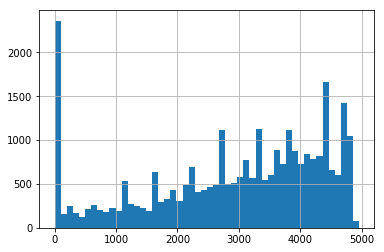

In [16]:
df['isochrone_circle_distance'].hist(bins=50)

In [17]:
df['scenario_no_dist'] = df['scenario'].str[:-3]

In [18]:
df_latlon = pd.read_csv('../data/station_lat_lon_key.csv')

In [19]:
df = df.merge(df_latlon, left_on='departure_station', right_on='nasty_station')
df.rename({'lat':'lat_departure',
           'lon':'lon_departure',
           'pretty_station':'pretty_departure_station'}, axis='columns', inplace=True)
df.drop(columns=['nasty_station'], inplace=True)

In [20]:
df.head()

,scenario,departure_station,arrival_station,departure_hour,count_journey_time,mean_journey_time,min_journey_time,max_journey_time,count_wait_time,mean_wait_time,min_wait_time,max_wait_time,isochrone_circle_distance,scenario_no_dist,pretty_departure_station,lat_departure,lon_departure,SB_order,NB_order
0,Baseline NB,22nd STREET,SALESFORCE TRANSIT CENTER (STC) $,6,3,8.666667,8,9,60,10.5,0.0,25.0,4312.0,Baseline,22nd St,37.757576,-122.392412,2,29
1,Baseline NB,22nd STREET,SALESFORCE TRANSIT CENTER (STC) $,7,4,8.500000,8,9,60,9.7,0.0,23.0,4326.0,Baseline,22nd St,37.757576,-122.392412,2,29
2,Baseline NB,22nd STREET,SALESFORCE TRANSIT CENTER (STC) $,8,4,8.500000,8,9,60,9.7,0.0,23.0,4326.0,Baseline,22nd St,37.757576,-122.392412,2,29
3,Baseline NB,22nd STREET,SALESFORCE TRANSIT CENTER (STC) $,9,4,8.500000,8,9,60,9.7,0.0,23.0,4326.0,Baseline,22nd St,37.757576,-122.392412,2,29
4,Baseline NB,22nd STREET,SALESFORCE TRANSIT CENTER (STC) $,10,4,8.500000,8,9,60,9.7,0.0,23.0,4326.0,Baseline,22nd St,37.757576,-122.392412,2,29


In [21]:
df = df.merge(df_latlon, left_on='arrival_station', right_on='nasty_station')
df.rename({'lat':'lat_arrival',
           'lon':'lon_arrival',
           'pretty_station':'pretty_arrival_station'}, axis='columns', inplace=True)
df.drop(columns=['nasty_station'], inplace=True)

In [25]:
df['scenario_no_dist'] = df['scenario_no_dist'].str.title()

In [26]:
df['scenario_no_dist'].unique()

array(['Baseline', 'High', 'Moderate'], dtype=object)

In [27]:
df.to_csv('../data/parsed_data/schedules/all_schedules_metrics_final.csv', index=False)